In [5]:
# HW8, Part 1, Plot 1
# Create histogram showing bed counts of Acute Care Hospitals in Massachusetts
# modified from examples at:
# https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
# https://matplotlib.org/gallery/statistics/histogram_features.html#sphx-glr-gallery-statistics-histogram-features-py
# https://matplotlib.org/3.1.3/gallery/statistics/hist.html
# https://www.w3schools.com/python/python_ml_mean_median_mode.asp#:~:text=The%20mean%20value%20is%20the%20average%20value.%20To,The%20NumPy%20module%20has%20a%20method%20for%20this.
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# From https://docs.digital.mass.gov/dataset/massgis-data-acute-care-hospitals
hospitalData = pd.read_csv("HOSPITALS_PT.csv")  #type(hospitalData) is pandas.core.frame.DataFrame

In [7]:
x = hospitalData["BEDCOUNT"]   #type(x) is pandas.core.series.Series

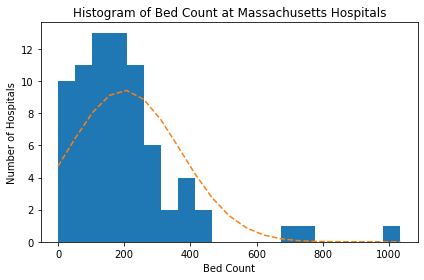

In [29]:
num_bins = 20
fig, ax = plt.subplots()    #type(fig) is matplotlib.figure.Figure 
                            #type(ax) is matplotlib.axes._subplots.AxesSubplot

# find mean and standard deviation
numValues = len(x)        #type(numValues) is int  #value is 75
mu = np.mean(x)           #type(mu) is numpy.float64, #value is 199.5066666666
sigma = np.std(x)         #type(sigma) is numpy.float64 #value is 169.27897080132416

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins) #,density=True) #density=True changes the values on the y axis
                            #type(n) is numpy.ndarray  #type(bins) is numpy.ndarray
                            #type(patches) is matplotlib.container.BarContainer

# add a 'best fit' line, only works with density=True parameter on hist() method
# I multiplied the value of y by 4000 to approximate the appearance of the 
# 'best fit' line wihtout using the density=True parameter, it is not a 
# normal distribution
y = (((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)))*4000  #type(y) is numpy.ndarray

ax.plot(bins,y, '--')

ax.set_xlabel("Bed Count")
ax.set_ylabel("Number of Hospitals")
ax.set_title("Histogram of Bed Count at Massachusetts Hospitals")

#Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

